# Keras API Project

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


### Data Overview

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu


# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

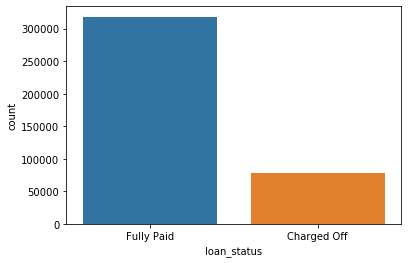

In [9]:
#Creating countplot of loan statuses distributions in this dataset
sns.countplot(x='loan_status', data=df)

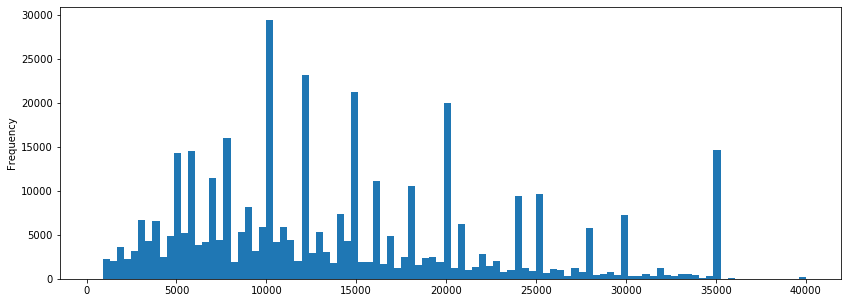

In [10]:
plt.figure(figsize=(14,5))
df['loan_amnt'].plot.hist(bins=100)

In [11]:
#Checking correlation between continuous numeric variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


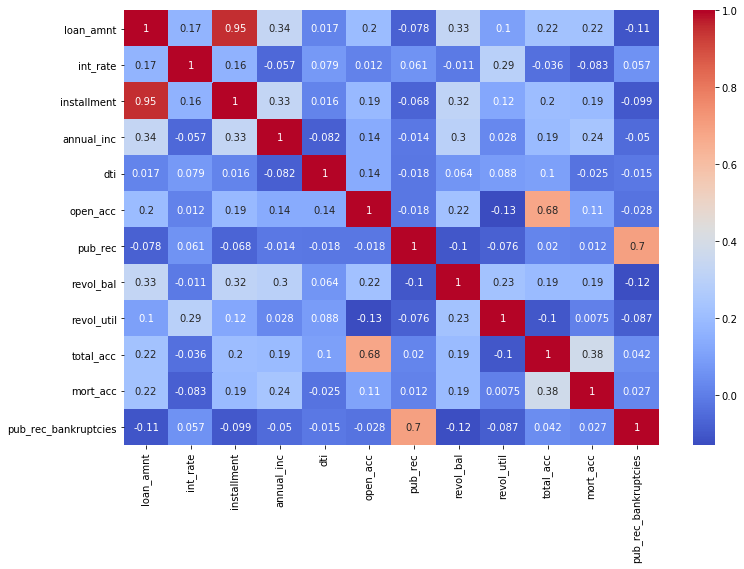

In [12]:
#Visualizing heatmap of variables correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [13]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


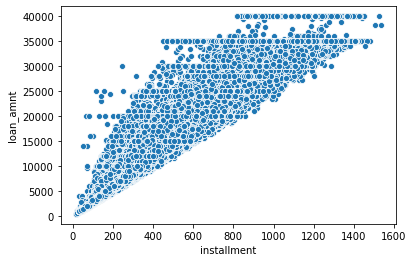

In [15]:
#Since almost perfect correlation is shown between 'installment' and 'loan_amnt' checking their scatterplot. It shows that installment
#might be providing duplicate information.
sns.scatterplot(x='installment', y='loan_amnt', data=df)

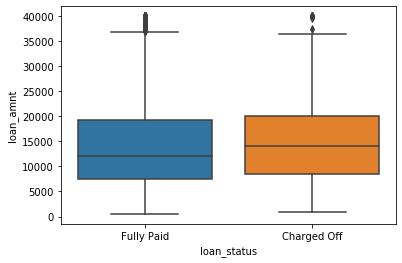

In [16]:
#Boxplot of relationship between amount of loan being taken and status of that loan
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [17]:
#summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
#Unique grades
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
#unique subgrades
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

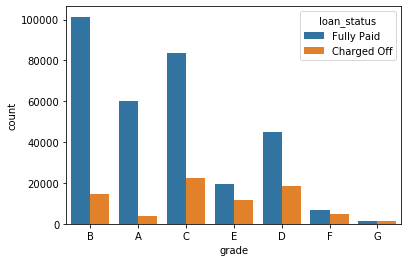

In [20]:
#Creating count plot per set grade by loan_status
sns.countplot(x='grade', hue='loan_status', data=df)

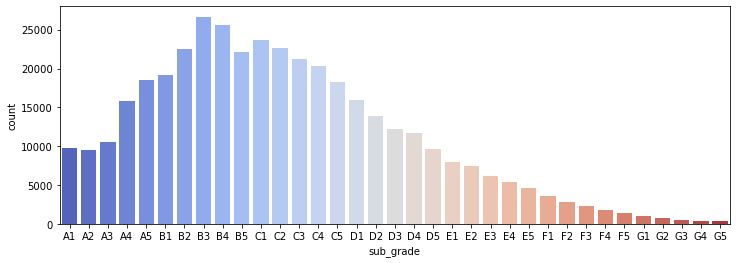

In [21]:
#Creating countplot of loans that were given to different sub_grades
plt.figure(figsize=(12,4))
reorder = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=reorder)

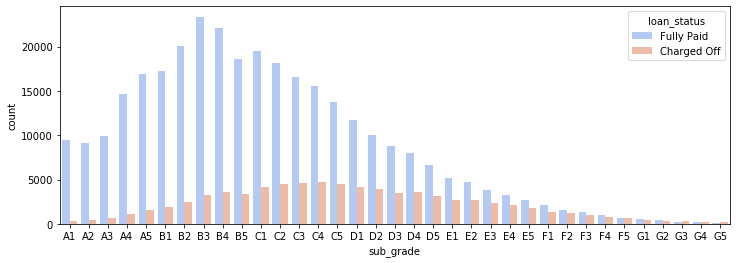

In [22]:
#Creating countplot of loans that were given to different sub_grades. Only now hue is set to 'loan_status'
plt.figure(figsize=(12,4))
reorder = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', hue='loan_status', data=df, palette='coolwarm', order=reorder)

In [23]:
#Creating df of F and G groups because it looks like clients of those groups are defaulting quite ofter
f_g_grade_df = df.loc[(df['grade'] == 'F') | (df['grade'] == 'G')]

In [24]:
f_g_grade_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.0,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.0,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.0,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.0,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"


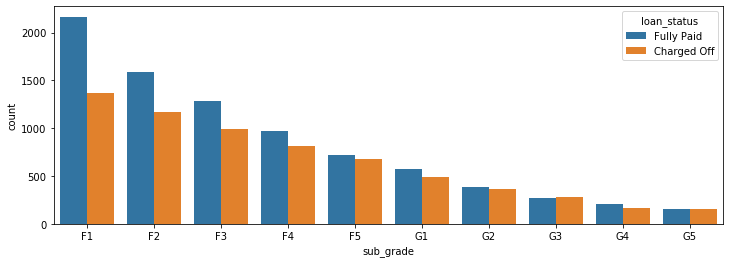

In [25]:
#Creating count plot of sub groups
plt.figure(figsize=(12,4))
reorder = sorted(f_g_grade_df['sub_grade'].unique())
sns.countplot(x='sub_grade', hue='loan_status', data=f_g_grade_df, order=reorder)

In [26]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
#Creating new variable called 'loan_repaid' which contains 1 if loan was repaid and 0 otherwise
df['loan_repaid'] = np.where(df['loan_status'].str.contains("Fully Paid"), 1, 0)

In [28]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


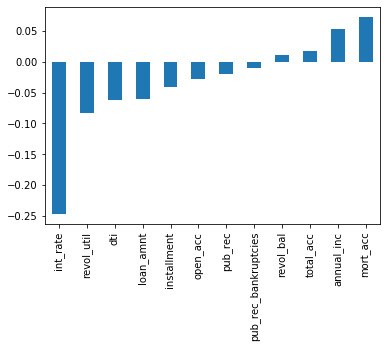

In [29]:
#Creating bar plot showing correlation between 'loan_repaid' and other variables
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [31]:
len(df)

396030

In [32]:
missing_values_count = pd.Series(df.isnull().sum())

In [33]:
missing_values_count

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
#Converting previous series values to percentage of full df length
missing_values_count = (missing_values_count/len(df))*100

In [35]:
missing_values_count

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [37]:
feat_info('emp_title')

feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [38]:
df['emp_title'].nunique()

173105

In [39]:
#It seems that there are too many different job titles that were entered so dropping this column all together because there would
#be too many additional features in case of 'dummy variables'
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
Primary Color Inc.                   1
Jamestown Area School District       1
Manager Renewable Energy             1
Visual                               1
DMC Service Group                    1
Name: emp_title, Length: 173105, dtype: int64

In [40]:
df.drop('emp_title', axis=1, inplace=True)

In [41]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [42]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

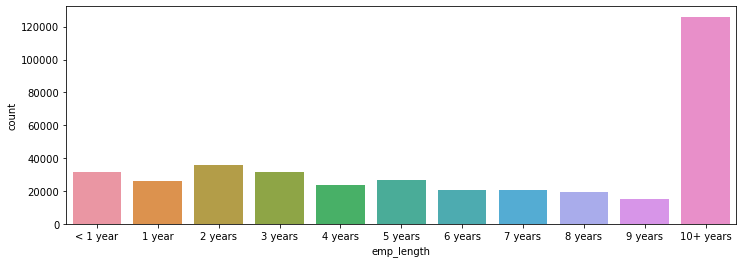

In [43]:
#Creating countplot for emp_length column
plt.figure(figsize=(12,4))
order_emp_length = sorted(df['emp_length'].dropna().unique())
sns.countplot(x='emp_length', data=df, order=emp_length_order)

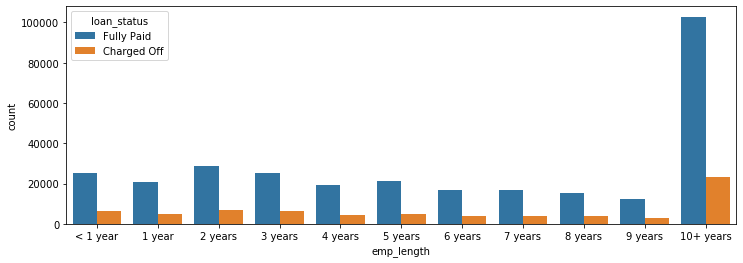

In [44]:
#Creating countplot for emp_length column and also using hue to separate loan_status
plt.figure(figsize=(12,4))
order_emp_length = sorted(df['emp_length'].dropna().unique())
sns.countplot(x='emp_length', hue='loan_status', data=df, order=emp_length_order)

In [45]:
df_2 = df[['emp_length', 'loan_status']]

In [46]:
df_2 = df_2.dropna()

In [47]:
emp_co = df_2[df_2['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [48]:
emp_fp = df_2[df_2['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [49]:
#Checking percentage of being charged off in every group of employment length
emp_perc = emp_co/emp_fp

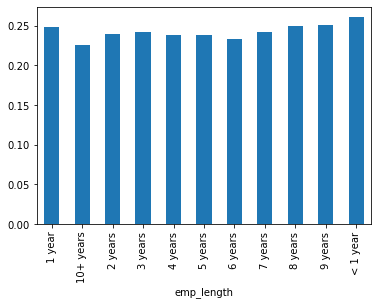

In [50]:
emp_perc.plot(kind='bar')

In [51]:
#Actually it's pretty similar across all lengths. Dropping this column as well
df.drop('emp_length', axis=1, inplace=True)

In [52]:
#Checking what columns are still missing data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [53]:
#Title and purpose could contain same information. Investigating that
df['purpose'].head(20)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
15        major_purchase
16    debt_consolidation
17    debt_consolidation
18    debt_consolidation
19    debt_consolidation
Name: purpose, dtype: object

In [54]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [55]:
#It's actually true and therefore dropping title column
df.drop('title', axis=1, inplace=True)

In [56]:
#mort_acc contains missing values, investigating that column

In [57]:
feat_info('mort_acc')

Number of mortgage accounts.


In [59]:
#checking value counts of this column
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [60]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [61]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [62]:
#fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, 
#then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series created above. 
total_avg_acc = df.groupby('total_acc').mean()['mort_acc']

In [63]:
total_avg_acc[2.0]

0.0

In [64]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_avg_acc[total_acc]
    else:
        return mort_acc

In [65]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [66]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [67]:
#Removing other missing values as number of those is low
df = df.dropna()

In [68]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [69]:
#String columns
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term feature

In [70]:
#Convert the term feature into either a 36 or 60 integer numeric data type
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [71]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

### grade feature

In [72]:
#Sub grade is part of grade so dropping grade feature
df = df.drop('grade', axis=1)

In [73]:
#Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe
one_hot = pd.get_dummies(df['sub_grade'], drop_first=True)

In [74]:
df = pd.concat([df, one_hot], axis=1)

In [75]:
df = df.drop('sub_grade', axis=1)

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose

In [77]:
#Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables 
#and concatenate them with the original dataframe
one_hot_2 = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

In [78]:
df = pd.concat([df, one_hot_2], axis=1)

In [79]:
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)

### home_ownership

In [80]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [81]:
#Converting 'home_ownership' to dummy variables and also replacing 'NONE' and 'ANY' values to 'OTHER' because they have small count
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [82]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)

In [83]:
df = df.drop('home_ownership', axis=1)

In [84]:
#Extracting zip code from 'address' feature
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [85]:
#Creating dummy variables from 'zip_code' feature
df = pd.concat([df, pd.get_dummies(df['zip_code'], drop_first=True)], axis=1)

In [86]:
df = df.drop(['address', 'zip_code'], axis=1)

In [87]:
#Dropping this feature as it contains info about month in which loan was funded and that creates data leakage
df = df.drop('issue_d', axis=1)

In [88]:
#Extracting year from 'earliest_cr_line'
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [89]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x.year)

In [90]:
df = df.drop('earliest_cr_line', axis=1)

## Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
#Dropping 'loan_status' as it is duplicate of 'loan_repaid' which contains 0's and 1's already
df = df.drop('loan_status', axis=1)

In [93]:
#Setting features and target variable
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train= scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [108]:
type(y_train)

pandas.core.series.Series

In [110]:
# CODE HERE
model = Sequential()

model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [111]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test.values), verbose=1
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 10s 31us/sample - loss: 0.3144 - val_loss: 0.2664
Epoch 2/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2666 - val_loss: 0.2641
Epoch 3/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2638 - val_loss: 0.2634
Epoch 4/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2627 - val_loss: 0.2636
Epoch 5/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2619 - val_loss: 0.2637
Epoch 6/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2614 - val_loss: 0.2637
Epoch 7/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2612 - val_loss: 0.2632
Epoch 8/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2609 - val_loss: 0.2640
Epoch 9/25
316175/316175 [==============================] - 8s 25us/sample -

In [112]:
from tensorflow.keras.models import load_model

In [113]:
#Saving model for future generations :)!
model.save('test_model1.h5')

In [114]:
model_loss = pd.DataFrame(model.history.history)

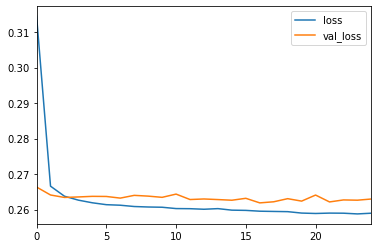

In [115]:
model_loss.plot()

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
#calculating predictions based on test data
predictions = model.predict_classes(X_test)

In [119]:
print(confusion_matrix(y_test,predictions))

[[ 6721  8937]
 [    0 63386]]


In [120]:
#recall isn't showing great results (dropout layers??)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [122]:
#selecting random person and calculating if we should give him a loan
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [124]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [126]:
#looks like we predicted correctly
df.iloc[random_ind]['loan_repaid']

1.0